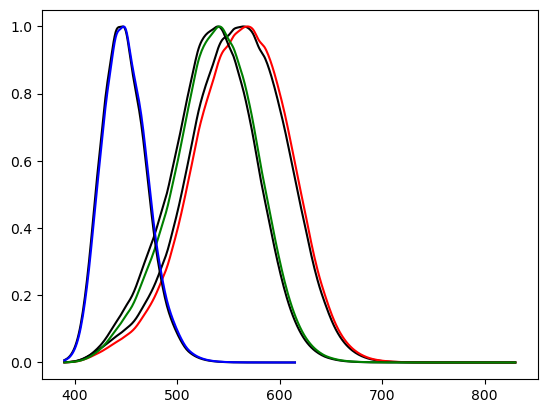

In [80]:
# plot_csv("ss10deg_10q_1", 1, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10e_1", 1, f=lambda x: np.power(10, x), color='red')

# plot_csv("ss10deg_10q_1", 2, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10e_1", 2, f=lambda x: np.power(10, x), color='green')

# plot_csv("ss10deg_10q_1", 3, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10e_1", 3, f=lambda x: np.power(10, x), color='blue')

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import pandas as pd

In [2]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
from chromalab.spectra import Spectra
from chromalab.observer import Observer, Cone, neitz_cone
from chromalab.inks import Neugebauer, InkGamut

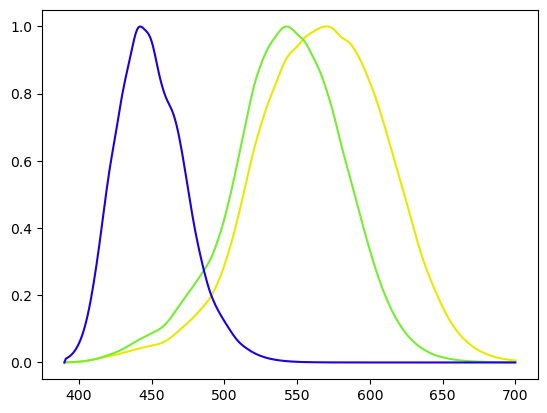

In [6]:
Cone.l_cone(wavelengths1).plot()
# Cone.q_cone(wavelengths1).plot()
Cone.m_cone(wavelengths1).plot()
Cone.s_cone(wavelengths1).plot()

ok so I should probably add log scale support to cones 

i mean it literally looks like its just log 10, 10 ^ .. 

so idc for now

## Tools

In [135]:
def plot(wavelengths, data, f=None, color=None):
    if f is None:
        f = lambda x: x
    plt.plot(wavelengths, f(data), color=color)

In [136]:
def plot_csv(name, column, f=None, color=None):
    file_path = f"../../chromalab/cones/{name}.csv"
    cone_data = pd.read_csv(file_path, header=None).iloc[:, [0, column]].dropna().to_numpy()
    wavelengths = cone_data[:, 0]
    data = cone_data[:, 1]
    plot(wavelengths, data, f=f, color=color)

## Neitz

In [137]:
wavelengths420 = np.arange(380, 801, 1)

In [138]:
def plot_neitz(peak, od=0.35, wavelengths=None, output="alog", extinct=0, f=None, color=None):
    if wavelengths == None:
        wavelengths = wavelengths420
    data = neitz_cone(wavelengths=wavelengths, lambda_max=peak, OD=od, output=output)[extinct]
    plot(wavelengths, data, f=f, color=color)

/Users/varun/Documents/Python/ChromaLab/chromalab/observer.py:51: RuntimeWarning: divide by zero encountered in log10
  ex_temp1 = np.log10(-E + E * np.tanh(-((10 ** (vector - A2)) - F) / G)) + D
/Users/varun/Documents/Python/ChromaLab/chromalab/observer.py:61: RuntimeWarning: divide by zero encountered in log10
  OD_temp = np.log10((1 - 10 ** -((10 ** ex_temp) * Z)) / (1 - 10 ** -Z))


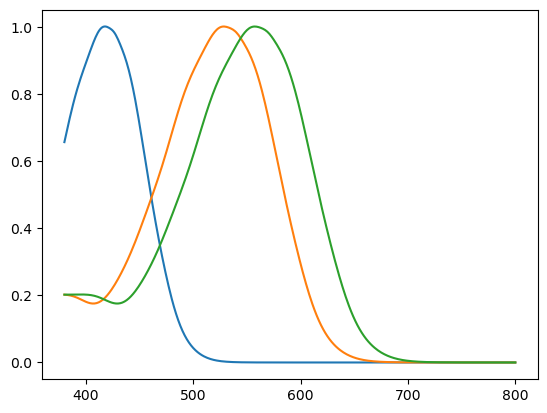

In [140]:
plot_neitz(419, od=0.22)
plot_neitz(530, od=0.35)
plot_neitz(559, od=0.35)

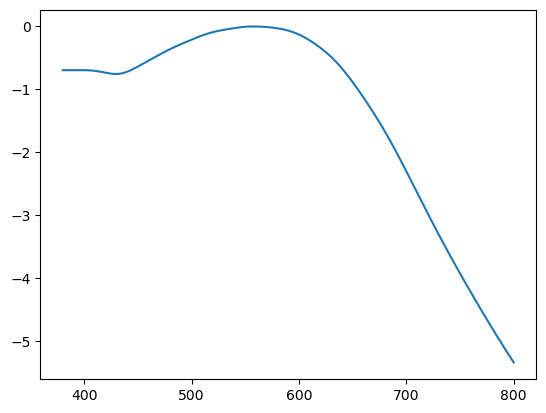

In [162]:
plot_neitz(559, od=0.35, output="log")

## Stockman & Sharpe 

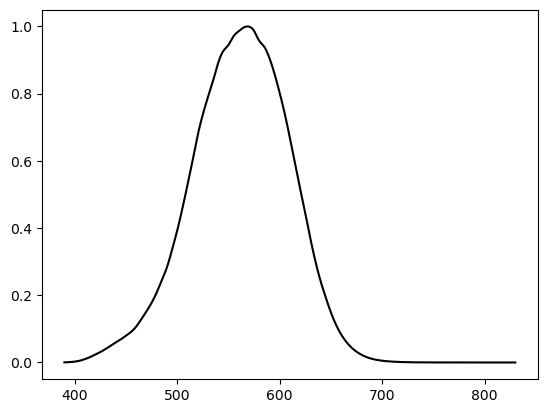

In [126]:
plot_csv("ss10deg_10lin", 1)

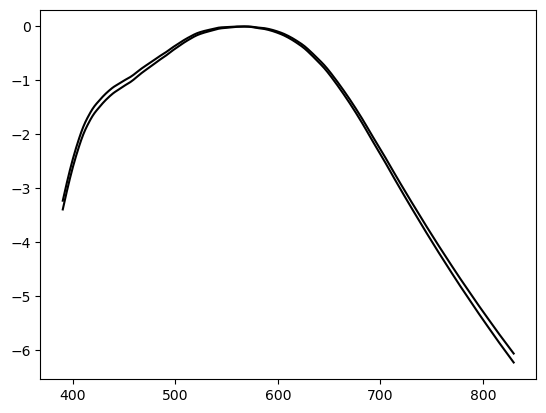

In [127]:
plot_csv("ss10deg_10e_1", 1)
plot_csv("ss10deg_10q_1", 1)

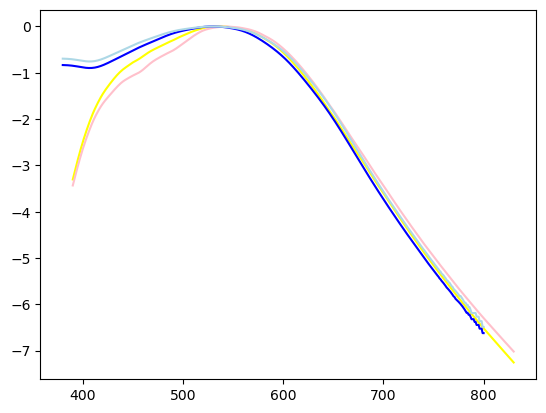

In [160]:
plot_csv("ss10deg_10q_1", 2, color='yellow')
plot_csv("ss2deg_10e_1", 2, color='pink')

plot_neitz(530, extinct=1, output="log", color='blue')
plot_neitz(530, extinct=0, output="log", color='lightblue')

*someone* is capping

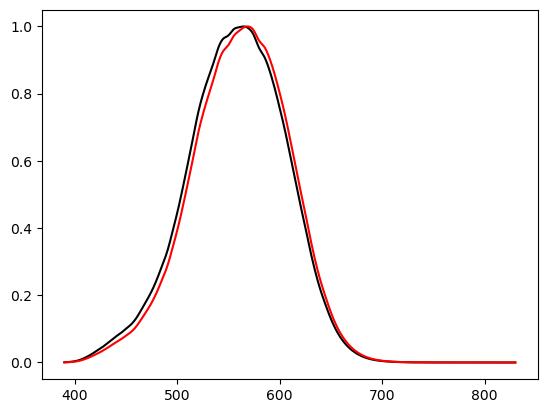

In [128]:
plot_csv("ss10deg_10q_1", 1, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10e_1", 1, f=lambda x: np.power(10, x), color='red')

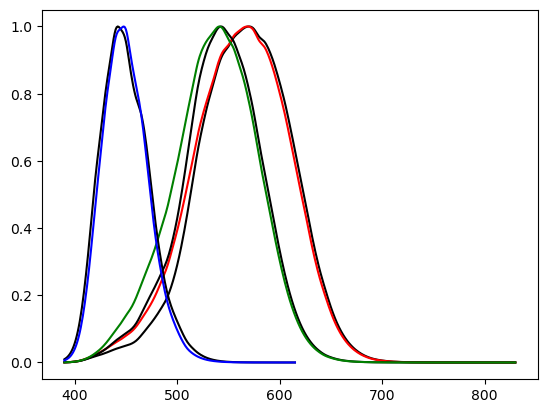

In [129]:
plot_csv("ss2deg_10e_1", 1, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10e_1", 1, f=lambda x: np.power(10, x), color='red')

plot_csv("ss2deg_10e_1", 2, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10e_1", 2, f=lambda x: np.power(10, x), color='green')

plot_csv("ss2deg_10e_1", 3, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10e_1", 3, f=lambda x: np.power(10, x), color='blue')

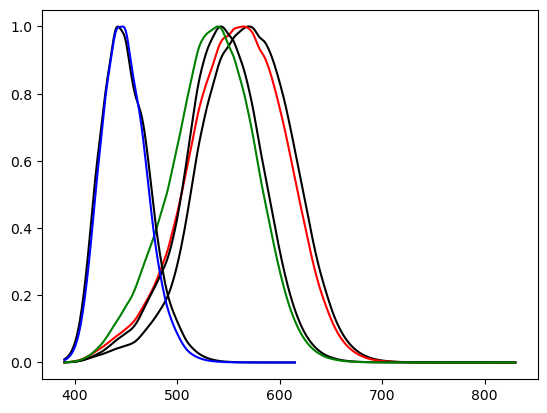

In [130]:
plot_csv("ss2deg_10e_1", 1, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10q_1", 1, f=lambda x: np.power(10, x), color='red')

plot_csv("ss2deg_10e_1", 2, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10q_1", 2, f=lambda x: np.power(10, x), color='green')

plot_csv("ss2deg_10e_1", 3, f=lambda x: np.power(10, x))
plot_csv("ss10deg_10q_1", 3, f=lambda x: np.power(10, x), color='blue')

## Lamb

In [181]:
def lamb(wavelengths, peak):
    A, B, C, D = 0.880, 0.924, 1.104, 0.655
    a, b, c = 70, 28.5, -14.1
    t = peak / wavelengths
    
    return np.reciprocal(a * np.exp(A - t) + np.exp(b * (B - t)) + np.exp(c * (C - t)) + D)

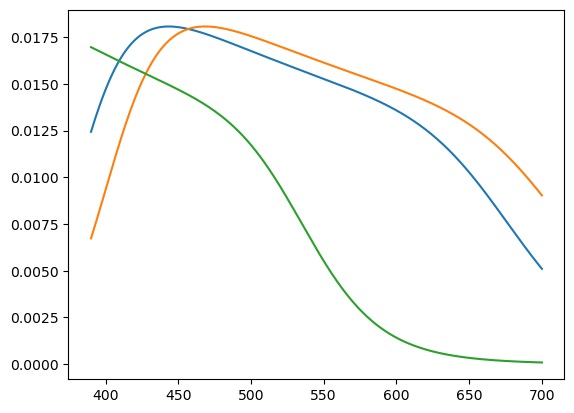

In [182]:
plot(wavelengths1, lamb(wavelengths1, 530))
plot(wavelengths1, lamb(wavelengths1, 560))
plot(wavelengths1, lamb(wavelengths1, 419))

???

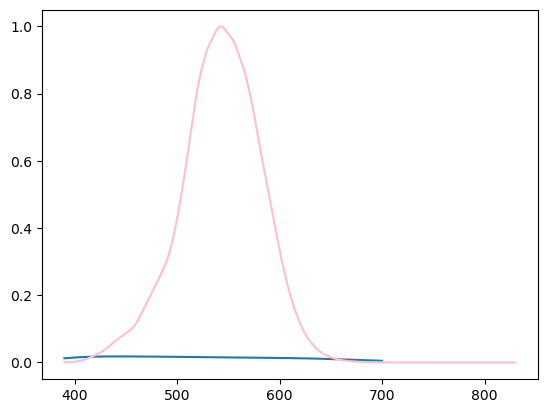

In [178]:
plot(wavelengths1, lamb(wavelengths1, 530))
plot_csv("ss2deg_10lin", 2, color='pink')